In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
234,15619407,Female,38.0,112000.0,0
218,15666675,Female,46.0,96000.0,0
301,15678201,Male,48.0,74000.0,1
310,15717893,Female,42.0,70000.0,0
91,15636428,Female,30.0,116000.0,0


In [3]:
len(df)

400

In [4]:
df = df.sample(200)

In [5]:
len(df)

200

In [6]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

X[:, 1] = X[:, 1] / 1000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression 0.75
Kernel SVM 0.925
Gaussian Naive Bayes 0.8
Decision Tree 0.925
Random Forest 0.95
K-Nearest Neighbors 0.9


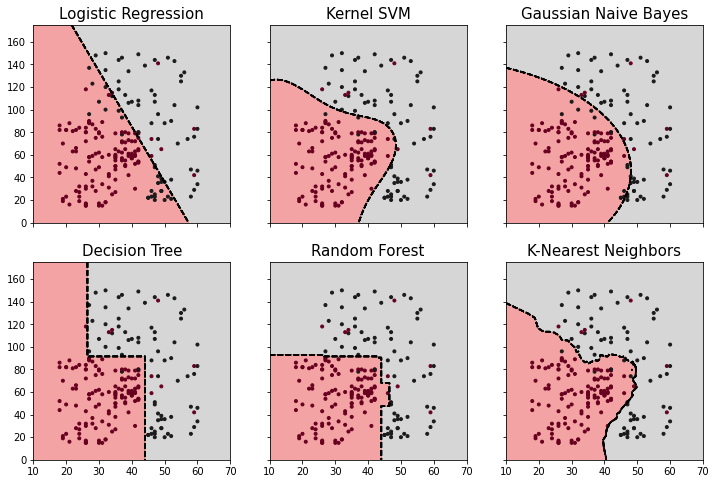

In [9]:
classifiers = [LogisticRegression(solver="lbfgs", random_state=0),
               SVC(kernel="rbf", random_state=0),
               GaussianNB(),
               DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_split=20),
               RandomForestClassifier(n_estimators=30, n_jobs=4,
                                      criterion='entropy',
                                      random_state=0, min_samples_split=40),
               KNeighborsClassifier(p=2)]
names = ["Logistic Regression", "Kernel SVM", "Gaussian Naive Bayes",
         "Decision Tree", "Random Forest", "K-Nearest Neighbors"]

fig, axs = plt.subplots(2, 3, sharex="all", sharey="all", figsize=(12, 8))

for ax, name, classifier in zip(np.array(axs).flatten(), names, classifiers):
    classifier = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(name, classifier.score(X_test, y_test))

    N = 1000
    x1 = np.linspace(10, 70, N)
    x2 = np.linspace(0, 175, N)
    X1, X2 = np.meshgrid(x1, x2)
    y_grid = classifier.predict(sc.transform(np.hstack([X1.flatten()[:, None],
                                                        X2.flatten()[:, None]])))

    plt.sca(ax)
    plt.contourf(x1, x2, y_grid.reshape((N, N)), cmap="Set1", alpha=.4)
    plt.contour(x1, x2, y_grid.reshape((N, N)), colors="black", linestyles="--")
    plt.scatter(*X.T, c=y, cmap="RdGy", marker=".")    
    plt.title(name, fontsize=15)

#fig.text(0.5, 0.09, 'Age', ha='center', va='center', fontsize=14)
#fig.text(0.07, 0.5, 'Salary (k\$)', ha='center', va='center', rotation='vertical', fontsize=14)

#plt.savefig('classifiers.pdf')
plt.savefig('classifiers_solution.pdf')